In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import differential_evolution

In [119]:
def probs(a, b, c, Ew1, Ew2, Ebp):
    shift1 = 8
    shift2 = 16
    end = 24
    probs = []
    for i in range(end):
        if i in range(0, shift1):
            Et = i*Ebp
        if i in range(shift1, shift2):
            Et = Ew1 + i*Ebp
        if i in range(shift2, end):
            Et = Ew1 + Ew2 + i*Ebp
        p = b/(1+a*np.exp(Et)) + c
        probs.append(p)
    return probs

In [120]:
new_x = [316.46737191, 160.00993453,   5.00609395,   5.16308511,
        -0.68644818]

In [121]:
full_length = probs(new_x[1], 1, 0, new_x[3], new_x[3], new_x[4])
x = np.arange(0, 30, 1)

In [122]:
E_array = []
E = 0
for j in range(24):
    E_array.append(E)
    E = E + new_x[4]
    if j == 7:
        E = E + new_x[3]
    if j == 15:
        E = E + new_x[3]

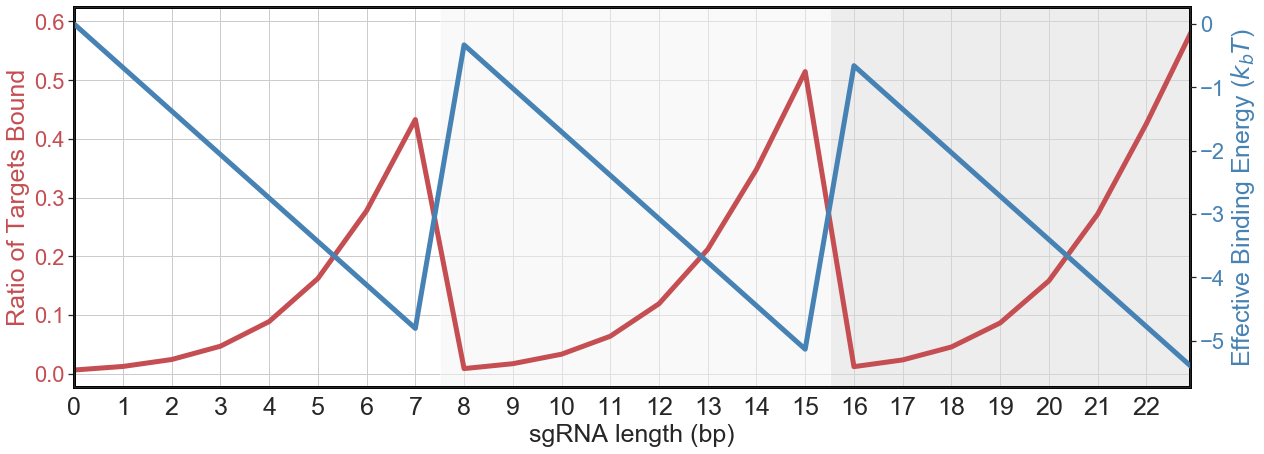

In [143]:
ax1 = plt.axes()
color1 = 'r'
plt.rcParams['figure.figsize'] = [20, 7]
plt.plot(x[:24], full_length[:24], lw = 5, c = color1)
sns.set(font_scale = 2)
sns.set_style("white")
plt.ylabel('Ratio of Targets Bound', fontsize = 25, c = color1)
plt.xlabel('sgRNA length (bp)', fontsize = 25)
plt.xticks(np.arange(0, 25, 1), fontsize = 25)
plt.xlim(0, 22.9)
plt.tick_params(axis='y', labelcolor=color1)
plt.axvspan(7.5, 15.5, facecolor='whitesmoke', alpha=0.5)
plt.axvspan(15.5, 23.5, facecolor='gainsboro', alpha=0.5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'steelblue' # we already handled the x-label with ax1
ax2.plot(x[:24], E_array[:24], lw = 5, c = color2)
ax2.tick_params(axis='y', labelcolor=color2)
plt.xticks(fontsize = 25)
plt.ylabel('Effective Binding Energy ($k_bT$)', fontsize = 25, c = color2)
sns.set_style("whitegrid")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.show()